In [43]:
# Two hidden layer with tanh, and one output layer with softmax
import numpy as np

def init_model(b_size):
    
    #b_size = 6000 #batch size
    #X = np.multiply(x_train[0:b_size],1/255)
    #ans = t_train[:b_size]
    #y = convert_ans(ans, b_size)

    np.random.seed(1)
    w1 = 2*np.random.random((784,50))-1
    b1 = np.full((b_size,50),1)

    w2 = 2*np.random.random((50,20))-1
    b2 = np.full((b_size,20),1)

    w3 = 2*np.random.random((20,10))-1
    b3 = np.full((b_size,10),1)

    model={'w1':w1,'w2':w2,'w3':w3,'b1':b1,'b2':b2,'b3':b3}

    return model#,X, y
    

In [44]:
def batch(b_size, order, x_train, t_train):
    head =  b_size * order 
    tail =  head + b_size
    
    X = np.multiply(x_train[head:tail], 1/255)
    ans = t_train[head:tail]
    y = format_t(ans, b_size)
    
    return X,y

def format_t(ans ,b_size):
    
    y = np.full((b_size, 10), 0)
    
    for i in range(b_size):
        j = ans[i]
        y[i][j] = 1
    return y



    

In [45]:
def loss_function(a3, y, b_size):
    
    each_class = y*np.log(a3) # t*log(y) -- hw1 note
    
    all_class = np.multiply(np.sum(each_class, axis=1),-1)   
    #-sum(t_i*log(y_i)) for i in each class 
    
    error_avg = np.true_divide(np.sum(all_class), b_size) 
    #average errors of examples in the given batch
    
    return(error_avg) 
    
def accuracy(a3, y, b_size):

    t = y.dot(np.array([0,1,2,3,4,5,6,7,8,9]).T)
    out = np.argmax(a3, axis=1)
    
    diff = t - out
    correct = np.count_nonzero(diff == 0)
    
    #print (correct/b_size)
    return (correct/b_size)
    
    

In [46]:

def tanh(x, deriv = False):
    if deriv is True: return 1 - x * x
    else: return np.tanh(x)
    
def softmax(x):
        e_x = np.exp(x - np.max(x))
        #return e_x / e_x.sum() 
        #return np.exp(x) / np.sum(np.exp(x), axis=1)
    
        a = e_x
        b = np.sum(e_x, axis=1)
        c = a
        for i in range(np.size(x,0)): #rows in x
            c[i] = a[i]/b[i]
        return c


In [47]:


def forward_prop(model,a0):    # a0 is the input
    w1,w2,w3,b1,b2,b3 = model['w1'],model['w2'],model['w3'],model['b1'],model['b2'],model['b3']

    z1 = a0.dot(w1) + b1       # input of first layer 
    a1 = tanh(z1)              # output of first layer
    
    z2 = a1.dot(w2) + b2
    a2 = tanh(z2)
    
    z3 = a2.dot(w3) + b3
    a3 = softmax(z3)
    #print(np.sum(a3,axis=1))
    
    cache = {'a0':a0,'z1':z1,'a1':a1,'z2':z2,'a2':a2,'z3':z3,'a3':a3}
    
    return cache
    
def backward_prop(model,cache,y): # y is the given answer
    a0,a1,a2,a3,z1,z2,z3 = cache['a0'],cache['a1'],cache['a2'],cache['a3'],cache['z1'],cache['z2'],cache['z3']
    w1,w2,w3,b1,b2,b3 = model['w1'],model['w2'],model['w3'],model['b1'],model['b2'],model['b3']
    
    dz3 = a3 - y # derivative of the loss function respect with input of output layer (applied softmax), it always y - z3
    dw3 = a2.T.dot(dz3)
    db3 = dz3
    
    dz2 = np.multiply(dz3.dot(w3.T),tanh(a2,True)) 
    dw2 = a1.T.dot(dz2)
    db2 = dz2
    
    dz1 = np.multiply(dz2.dot(w2.T),tanh(a1,True))
    dw1 = a0.T.dot(dz1)
    db1 = dz1
   
    grads = {'dw1':dw1,'dw2':dw2,'dw3':dw3,'db1':db1,'db2':db2,'db3':db3}
    return grads
    
def update(model,grads):
    w1,w2,w3,b1,b2,b3 = model['w1'],model['w2'],model['w3'],model['b1'],model['b2'],model['b3']
    dw1,dw2,dw3,db1,db2,db3 = grads['dw1'],grads['dw2'],grads['dw3'],grads['db1'],grads['db2'],grads['db3']
    lr = 0.0007 # learning rate
   
    w3 -= lr * dw3
    w2 -= lr * dw2
    w1 -= lr * dw1
    
    b3 = b3.astype(np.float32) - lr * db3   
    b2 = b2.astype(np.float32) - lr * db2
    b1 = b1.astype(np.float32) - lr * db1    

    model={'w1':w1,'w2':w2,'w3':w3,'b1':b1,'b2':b2,'b3':b3}
    return model



   

In [67]:
import matplotlib.pyplot as plt
def plot(loss_train, loss_test, acc_train, acc_test, epoch):
    plt.figure(1)
    plt.subplot(1,2,1)
    plt.axis([-1 ,epoch ,0 ,1])
    plt.plot(acc_train,'ro')
    plt.subplot(1,2,2)
    plt.axis([-1 ,epoch ,0 ,1])
    plt.plot(acc_test,'ro')
    plt.figure(2)
    plt.subplot(1,2,1)
    plt.plot(loss_train) # Values in range 0-256, because pixels stored as uint8.
    plt.subplot(1,2,2)
    plt.plot(loss_test)

[0.4076000000000001, 0.7226833333333335, 0.7627833333333334, 0.8208833333333334, 0.8332666666666667, 0.8524999999999999, 0.8664833333333333, 0.8735833333333334, 0.8833666666666666, 0.8897833333333335, 0.8943, 0.8988333333333334, 0.9026333333333334, 0.90575, 0.9089666666666667, 0.9123666666666664, 0.9154000000000001, 0.9182666666666668, 0.9205666666666666, 0.9230499999999999]
[0.6796, 0.7463, 0.8009, 0.84, 0.8434999999999999, 0.8676999999999999, 0.8681, 0.8747, 0.8797, 0.885, 0.8864000000000001, 0.8901, 0.8934, 0.8983, 0.9005000000000001, 0.9014, 0.9029, 0.9038999999999999, 0.905, 0.9056]


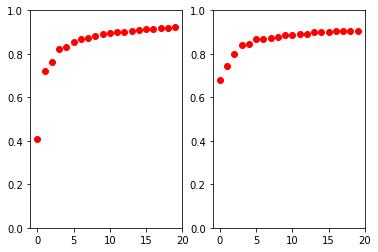

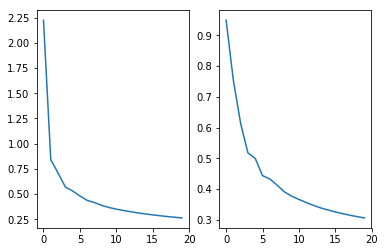

In [68]:

def main():
    import mnist
    x_train, t_train, x_test, t_test = mnist.load()
    
    b_size = 5000
    model = init_model(b_size)
       
    loss_train, loss_test, acc_train, acc_test = [], [], [], []
    
    for epoch in range(20):
    
        #----train the model-----
        
        b_num = int(x_train.shape[0]/b_size) #number of the batches
        loss,acc = 0.0, 0.0
        
        for order in range(b_num): #for each batch
            
            X , y = batch(b_size, order ,x_train,t_train)
            cache = forward_prop(model,X)    #save the output of forward_prop to cache
            loss += loss_function(cache['a3'], y , b_size)/b_num #compute the loss
            acc += (accuracy(cache['a3'], y, b_size))/b_num #compute accuracy
            
            grads = backward_prop(model,cache,y) #return the grads by back_prop
            model = update(model,grads) #update the model
            
        loss_train.append(loss) #save loss vale of each epoch to an array when training the data
        acc_train.append(acc) #save accuracy of each epoch to an array when training the data
        
        
        
        #-----test the model------
        
        b_num = int(x_test.shape[0]/b_size) #number of the batches
        loss, acc = 0.0, 0.0
        
        for order in range(b_num): #for each batch
            
            X , y = batch(b_size, order ,x_test,t_test)
            cache = forward_prop(model, X)         
            loss += loss_function(cache['a3'], y , b_size)/b_num
            acc += (accuracy(cache['a3'], y, b_size))/b_num
            
        loss_test.append(loss)  
        acc_test.append(acc)

    plot(loss_train, loss_test, acc_train, acc_test, epoch+1)
    print(acc_train)
    print(acc_test)

main() 

